<a href="https://colab.research.google.com/github/radmir02/-/blob/master/lab1SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
dataFilm_csv = pd.read_csv('FilmTV_dataset.csv')
dataFilm_csv

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12
...,...,...,...,...,...,...,...,...,...,...
46902,162511,Clowntergeist,2017,Horror,80,United States,Aaron Mirtes,"Aaron Mirtes, Brittany Belland, Monica Baker, ...",6.0,1
46903,162533,Vampirella,1996,Action,82,United States,Jim Wynorski,"Talisa Soto, Roger Daltrey, Richard Joseph Pau...",5.0,1
46904,162711,Circus of the Dead,2017,Action,102,United States,Billy 'Bloody Bill' Pon,"Bill Oberst Jr., Parrish Randall, Chanel Ryan,...",8.0,1
46905,162713,Fear of Clowns,2004,Horror,106,United States,Kevin Kangas,"Rick Ganz, Jacqueline Reres, Mark Lassise, Car...",2.0,1


In [ ]:
dataFilm_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46907 entries, 0 to 46906
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filmtv_ID   46907 non-null  int64  
 1   film_title  46907 non-null  object 
 2   year        46907 non-null  int64  
 3   genre       46736 non-null  object 
 4   duration    46907 non-null  int64  
 5   country     46868 non-null  object 
 6   director    46904 non-null  object 
 7   actors      46778 non-null  object 
 8   avg_vote    46907 non-null  float64
 9   votes       46907 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.6+ MB


In [12]:
print('Медиана: ', statistics.median(dataFilm_csv['duration']))

Медиана:  95


In [17]:
print('Значение моды: ', statistics.mode(dataFilm_csv['duration']))

Значение моды:  90


## **Выбросы**

In [18]:
min(dataFilm_csv['duration'])

40

In [19]:
max(dataFilm_csv['duration'])

5280

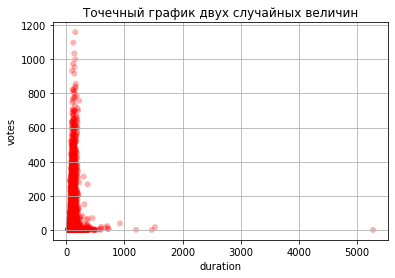

In [20]:
duration = dataFilm_csv['duration']
votes = dataFilm_csv['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Точечный график двух случайных величин')
plt.show()

# **Стандартное** отклонение

In [21]:
statistics.pstdev(dataFilm_csv[ 'duration'])

34.95860443683266

# **Дисперсия**

In [22]:
statistics.pvariance(dataFilm_csv[ 'duration'])

1222.1040241709359

# **Выбросы**

In [23]:
duration.isnull().sum()

0

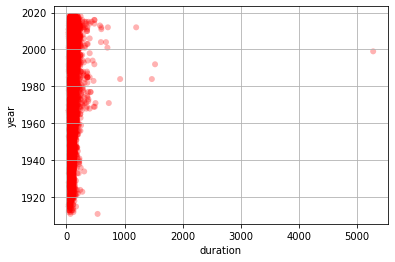

In [26]:
duration = dataFilm_csv[ 'duration']
year = dataFilm_csv['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

# **Размах**

In [27]:
duration_range = max(dataFilm_csv['duration'])- min(dataFilm_csv['duration'])
print(duration_range)

5240


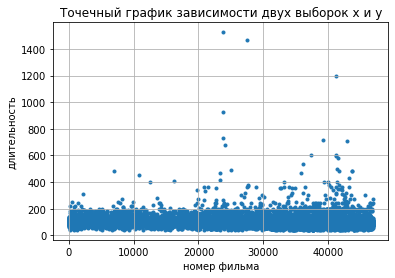

In [28]:
y = dataFilm_csv.loc[dataFilm_csv['duration'] < 5000, 'duration']

plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
# вектор от 0 до количество фильмов - 1 (так как мы удалили один фильм в первой строчке)
x = [i for i in range(0, len(duration)-1)]
plt.scatter(x, y, marker='.')
plt.show()

# **Гистограмма** **признака**

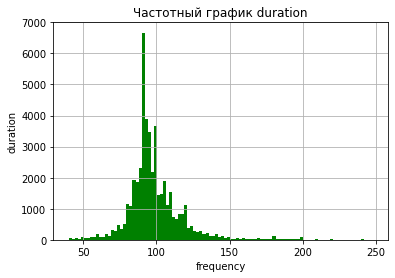

In [38]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(duration[duration < 250], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('duration')
plt.title('Частотный график duration')
plt.grid(True)
plt.show()

# **Отсев аномальных значений **

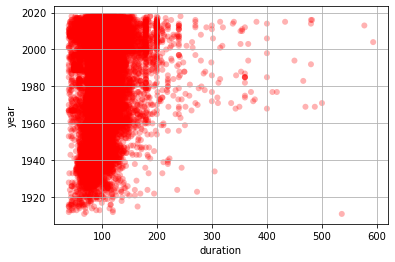

In [33]:
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

In [36]:
duration_without_vibros = duration[duration<600]

# **количество отсеянных значений**

In [34]:
print('Количество отсеянных значений',len(duration[duration>600]))

Количество отсеянных значений 9


# **построить диаграмму рассеяния и гистограмму признака duration**
# **после отсева аномалий, сделать выводы;**

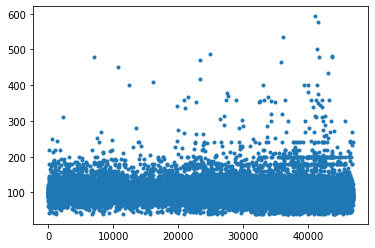

In [37]:
len_column = len(duration_without_vibros) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, duration_without_vibros, marker='.')

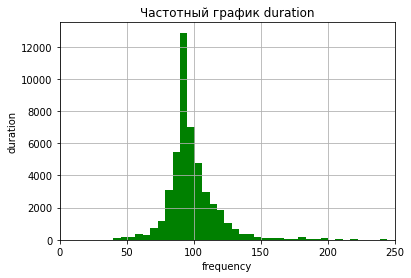

In [39]:
# гистограмма признака без аномальных значений
n, bins, patches = plt.hist(duration_without_vibros, 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('duration')
plt.xlim([0, 250])
plt.title('Частотный график duration')
plt.grid(True)
plt.show()

# код для моделирования 10 подбрасываний игрального
# кубика.

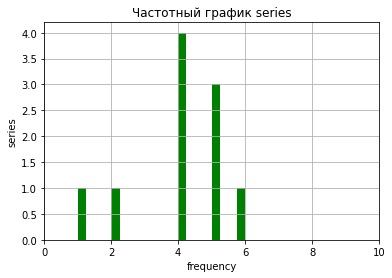

In [47]:
import random

a = []
for i in range(10):
    a.append(random.randint(1, 6))
series = pd.Series(a)
n, bins, patches = plt.hist(series, 20, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('series')
plt.xlim([0, 10])
plt.title('Частотный график series')
plt.grid(True)
plt.show()

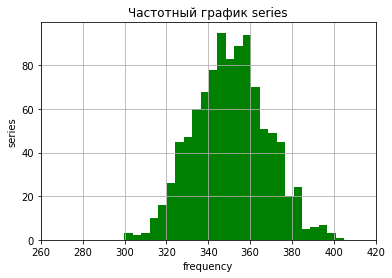

In [48]:
# игральный кубик х100

b = []

for i in range(1000):
  sum = 0
  for i in range(100):
    sum += random.randint(1, 6)
  b.append(sum)

for i in range(100):
  b.append(random.randint(1, 6))

series_1000 = pd.Series(b)

n, bins, patches = plt.hist(series_1000, 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('series')
plt.xlim([260, 420])
plt.title('Частотный график series')
plt.grid(True)
plt.show()

Вывод: получилось нормальное распределение, что потдверждает центрально-предельную теормему.